# Practical example: Logistic Regression: Classifiers

In this example, we will work with three different data sets to analyze the discretization of the
features, the first two datasets consist of linearly non-separable data, in which the first has two
categories that follow a moon-shaped distribution and the second has two categories that follow
a distribution in the form of concentric circles.

In this example we are going to perform the comparison of linear and non-linear classifiers for the
previously mentioned datasets.


dataset 0
----------------
LogisticRegression: 0.860000
LinearSVC: 0.860000
GradientBoostingClassifier: 0.900000
SVC: 0.940000

dataset 1
----------------
LogisticRegression: 0.400000
LinearSVC: 0.400000
GradientBoostingClassifier: 0.800000
SVC: 0.840000

dataset 2
----------------
LogisticRegression: 0.980000
LinearSVC: 0.980000
GradientBoostingClassifier: 0.880000
SVC: 0.980000


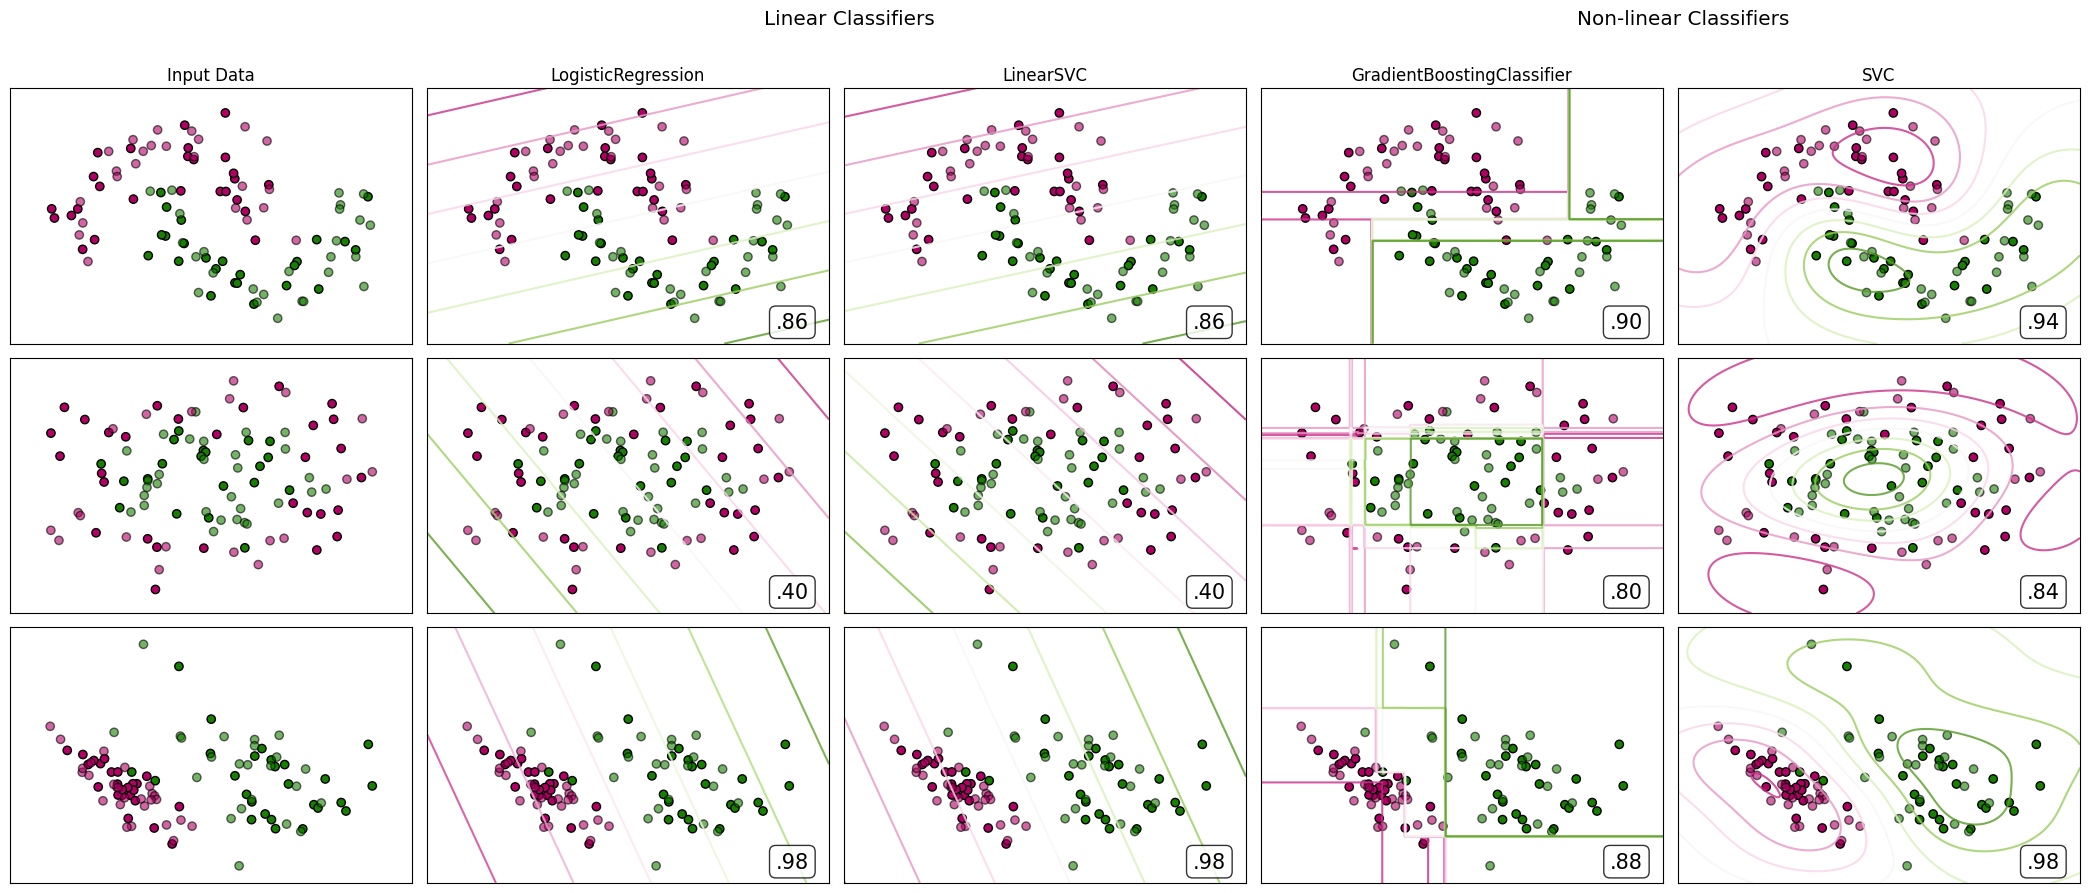

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

#preprocessing library
from sklearn.preprocessing import StandardScaler

#generate dataset
from sklearn.datasets import make_moons, make_circles, make_classification

#classifiers to buy
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


# create a list to define the classfiers to be used
# 2 linear are logistic and linearsvc
#two non linear are gradient boosting and svc

classifiers = [
    (LogisticRegression(random_state=0),{'C':np.logspace(-2,7,10)}),
    (LinearSVC(random_state=0), {'C':np.logspace(-2,7,10)}),
    (GradientBoostingClassifier(n_estimators=50, random_state=0), {'learning_rate':np.logspace(-4,0,10)}),
    (SVC(random_state=0), {'C':np.logspace(-2,7,10)}),
]


# Function to obtain names
def get_name(estimator):
    name = estimator.__class__.__name__
    return name

# The name of each classifier defined in the list is obtained.
names = [get_name(e) for e, g in classifiers]



#Generate datasets
n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_informative=2, random_state=2, n_clusters_per_class=1)
]


#define params for visualization

fig, axes = plt.subplots(nrows=len(datasets), ncols=len(classifiers)+1, figsize=(21,9))

#colormap
cm = plt.cm.PiYG

#brightness levels
cm_bright = ListedColormap(['#b30065','#178000'])

#Process data for each defined dataset
for ds_cnt, (X,y) in enumerate(datasets):
    print('\ndataset %d\n----------------' % ds_cnt)
    X = StandardScaler().fit_transform(X)
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

    # grid for background
    h = 0.02
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    #draw dataset first
    ax = axes[ds_cnt, 0]
    if ds_cnt==0:
       ax.set_title('Input Data')

    #draw training points w a brightness level
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright, edgecolors = 'k')

    #draw test points
    ax.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    #process dataset w each of the classifiers
    for est_idx, (name, (estimator, param_grid)) in enumerate(zip(names, classifiers)):
        ax = axes[ds_cnt, est_idx +1]

        #define classifier with estimator and params obtained from list
        classifier= GridSearchCV(estimator=estimator, param_grid=param_grid)
        #train classifier  and get performance metrics
        with ignore_warnings(category=ConvergenceWarning):
            classifier  .fit(X_train, y_train)
        score = classifier     .score(X_test, y_test)
        print('%s: %2f' % (name, score))

        #obtain decision surfaces
        if hasattr( classifier , 'decision_function'):
            Z = classifier     .decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = classifier     .predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

        #draw result
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, cmap=cm, alpha=.8)

        #add training points w a level of brightness
        ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright, edgecolors='k')
        #add points w different brightness
        ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt==0:
            ax.set_title(name.replace(' + ','\n'))
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0'), size=15,
                bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'), transform=ax.transAxes, horizontalalignment='right')

plt.tight_layout()

#add subtitles
plt.subplots_adjust(top=0.9)
subtitles = [
    'Linear Classifiers',
    'Non-linear Classifiers',
]

for i, subtitle in zip([1,3], subtitles):
    ax = axes[0,i]
    ax.text(1.05, 1.25, subtitle, transform=ax.transAxes, horizontalalignment='center', size='x-large')
plt.show()